In [148]:
import cv2
import matplotlib.pyplot as plt
import os
import json
import cv2
import numpy as np
import mediapipe as mp
import skimage
from skimage.io import imsave, imread
from skimage.transform import PiecewiseAffineTransform, warp

In [149]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

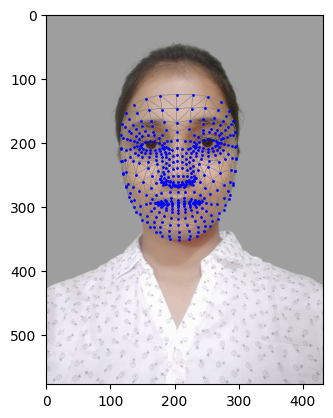

In [150]:
IMAGE_FILES = []
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    image = cv2.imread('shirsha.png')
    mainak=cv2.imread('DSC_0098-min.JPG')
    face = cv2.imread('canonical_face_model_uv_visualization.png', cv2.IMREAD_UNCHANGED)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    H,W,_ = image.shape
    annotated_image = image.copy()
    #print( results.multi_face_landmarks[0])
    for face_landmarks in results.multi_face_landmarks:

      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      
    img2=cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
    face_landmarks = results.multi_face_landmarks[0]
    keypoints = np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])
    
    #print(keypoints)
    xi=[i[0] for i in keypoints]
    yi=[i[1] for i in keypoints]
    plt.scatter(xi, yi, c ="blue",s=1)
    plt.imshow(img2)
    

In [151]:
uv_path = "./uv_map.json" #taken from https://github.com/spite/FaceMeshFaceGeometry/blob/353ee557bec1c8b55a5e46daf785b57df819812c/js/geometry.js
uv_map_dict = json.load(open(uv_path))
uv_map = np.array([ (uv_map_dict["u"][str(i)],uv_map_dict["v"][str(i)]) for i in range(468)])
print(uv_map)

[[0.49997699 0.65253401]
 [0.50002599 0.54748702]
 [0.49997401 0.60237199]
 [0.482113   0.47197902]
 [0.50015098 0.527156  ]
 [0.49991    0.49825299]
 [0.49952301 0.40106201]
 [0.28971201 0.38076401]
 [0.499955   0.31239802]
 [0.49998701 0.26991898]
 [0.50002301 0.10705   ]
 [0.50002301 0.66623402]
 [0.50001597 0.67922401]
 [0.50002301 0.692348  ]
 [0.49997699 0.69527799]
 [0.49997699 0.70593399]
 [0.49997699 0.71938503]
 [0.49997699 0.737019  ]
 [0.49996799 0.781371  ]
 [0.499816   0.56298101]
 [0.473773   0.57391   ]
 [0.104907   0.25414097]
 [0.36592999 0.409576  ]
 [0.33875799 0.41302502]
 [0.31112    0.40946001]
 [0.27465799 0.38913101]
 [0.39336199 0.40370601]
 [0.34523401 0.34401101]
 [0.370094   0.34607601]
 [0.31932199 0.34726501]
 [0.297903   0.35359102]
 [0.24779201 0.41080999]
 [0.396889   0.84275502]
 [0.28009799 0.37559998]
 [0.10631    0.39995599]
 [0.209925   0.39135301]
 [0.35580799 0.53440601]
 [0.471751   0.65040398]
 [0.47415501 0.68019199]
 [0.439785   0.65722901]


In [152]:
H_new,W_new = 512,512
keypoints_uv = np.array([(W_new*x, H_new*y) for x,y in uv_map])
print(keypoints_uv)

[[255.98822021 334.0974121 ]
 [256.01330565 280.3133545 ]
 [255.98669435 308.41445924]
 [246.84185789 241.65325926]
 [256.07730104 269.90386964]
 [255.95391846 255.1055298 ]
 [255.75578307 205.34374999]
 [148.33255004 194.95117189]
 [255.97695923 159.94778445]
 [255.99334717 138.19851684]
 [256.01177979  54.80960082]
 [256.01177979 341.1118164 ]
 [256.00817869 347.76269532]
 [256.01177979 354.48217774]
 [255.98822021 355.98233032]
 [255.98822021 361.43820191]
 [255.98822021 368.32513428]
 [255.98822021 377.35372923]
 [255.98361206 400.06195067]
 [255.90579226 288.24627686]
 [242.57177733 293.84191892]
 [ 53.71238328 130.12017823]
 [187.35615539 209.70291139]
 [173.4440918  211.46881106]
 [159.29344179 209.64352415]
 [140.62489318 199.23507692]
 [201.40133668 206.69747927]
 [176.75981138 176.13363645]
 [189.48812867 177.19091799]
 [163.49285888 177.79968261]
 [152.52633667 181.03860475]
 [126.86950682 210.33471677]
 [203.20716856 431.49057009]
 [143.41017149 192.30718996]
 [ 54.43072128

In [153]:
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
tform = PiecewiseAffineTransform()
tform.estimate(keypoints_uv,keypoints)
texture2 = warp(image, tform, output_shape=(H_new,W_new))
texture2 = (255*texture2).astype(np.uint8)

C:\Users\debma\AppData\Local\Temp\ipykernel_9292\2186218753.py:3: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(keypoints_uv,keypoints)


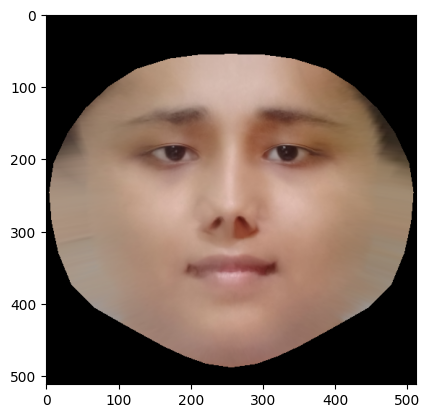

In [154]:
plt.imshow(texture2)
imsave("texture.jpg", texture2)
shtext=texture2.copy()

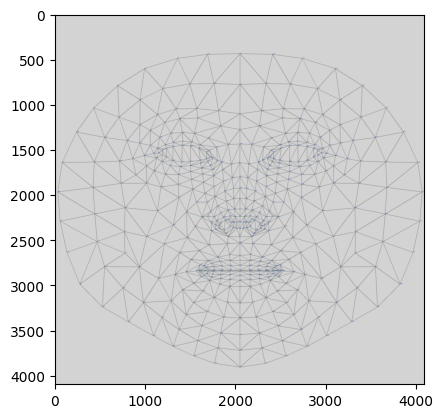

In [155]:
keypoints3d = np.array([(point.x,point.y,point.z) for point in face_landmarks.landmark[0:468]])
plt.imshow(face)
face = cv2.resize(face, (H_new,W_new))

C:\Users\debma\AppData\Local\Temp\ipykernel_9292\128115311.py:5: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(k2,keypoints_uv)


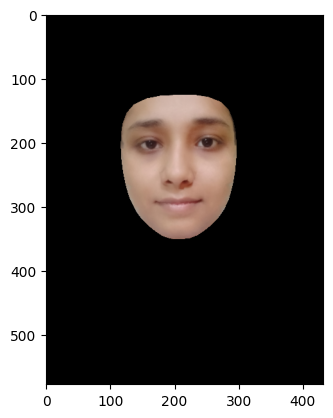

In [156]:

k2= np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#image = cv2.resize(image, (H_new,W_new))
tform = PiecewiseAffineTransform()
tform.estimate(k2,keypoints_uv)
texture = warp(texture2, tform, output_shape=(H,W))
texture = (255*texture).astype(np.uint8)
annotated_image = texture.copy()
plt.imshow(texture)


C:\Users\debma\AppData\Local\Temp\ipykernel_9292\3975976303.py:5: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(k2,keypoints_uv)


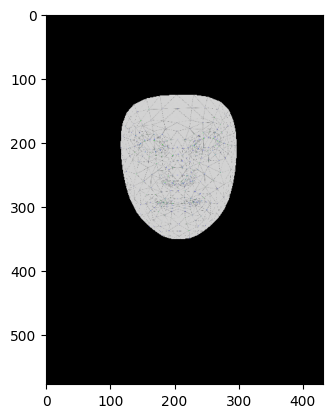

In [157]:
k2= np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#image = cv2.resize(image, (H_new,W_new))
tform = PiecewiseAffineTransform()
tform.estimate(k2,keypoints_uv)
texture = warp(face, tform, output_shape=(H,W))
texture = (255*texture).astype(np.uint8)
plt.imshow(texture)

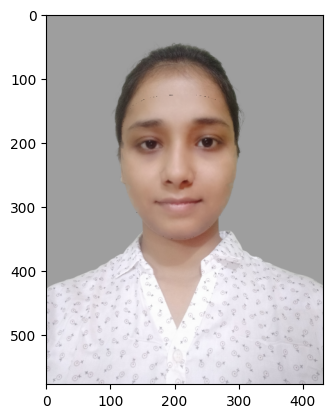

In [158]:
ret, mask = cv2.threshold(texture[:,:,0], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
image[np.where(mask == 255)] = annotated_image[np.where(mask == 255)]
#image[np.where(mask == 255)] = texture[np.where(mask == 255)]
plt.imshow(image)

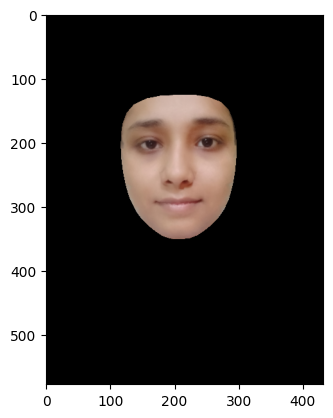

In [159]:
plt.imshow(annotated_image)

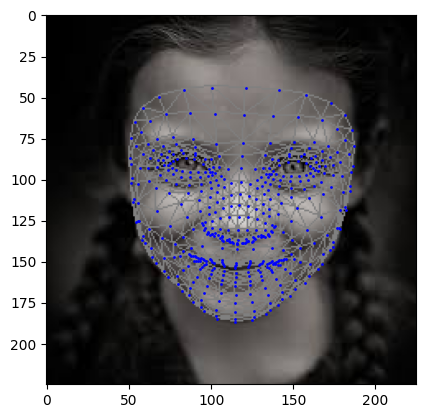

In [160]:
IMAGE_FILES = []
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    #image = cv2.imread('shirsha.png')
    image=cv2.imread('DSC_0098-min2.jpg')
    face = cv2.imread('canonical_face_model_uv_visualization.png', cv2.IMREAD_UNCHANGED)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    H,W,_ = image.shape
    annotated_image = image.copy()
    #print( results.multi_face_landmarks[0])
    for face_landmarks in results.multi_face_landmarks:

      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      
    img2=cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
    face_landmarks = results.multi_face_landmarks[0]
    keypoints = np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])
    
    #print(keypoints)
    xi=[i[0] for i in keypoints]
    yi=[i[1] for i in keypoints]
    plt.scatter(xi, yi, c ="blue",s=1)
    plt.imshow(img2)

C:\Users\debma\AppData\Local\Temp\ipykernel_9292\277293144.py:5: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(k2,keypoints_uv)


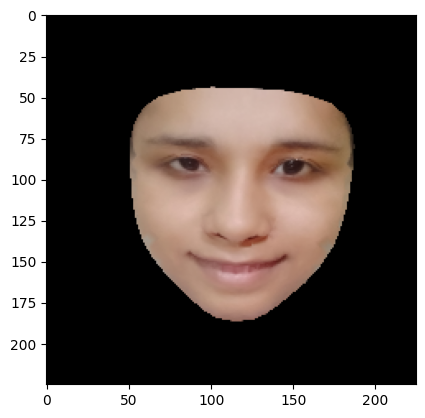

In [161]:
k2= np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#image = cv2.resize(image, (H_new,W_new))
tform = PiecewiseAffineTransform()
tform.estimate(k2,keypoints_uv)
texture3 = warp(shtext, tform, output_shape=(H,W))
texture3 = (255*texture3).astype(np.uint8)
plt.imshow(texture3)

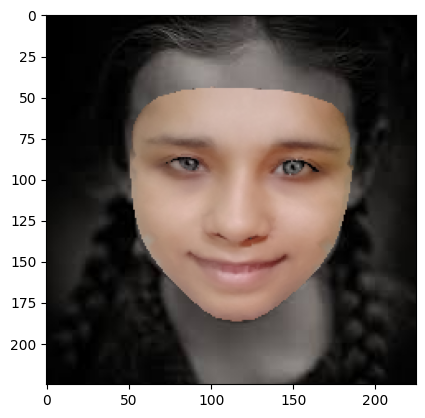

In [166]:
ret, mask = cv2.threshold(texture3[:,:,0], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
image[np.where(mask == 255)] = texture3[np.where(mask == 255)]
#image[np.where(mask == 255)] = texture[np.where(mask == 255)]
# image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [163]:
def load_obj(obj_filename):
    """ Ref: https://github.com/facebookresearch/pytorch3d/blob/25c065e9dafa90163e7cec873dbb324a637c68b7/pytorch3d/io/obj_io.py
    Load a mesh from a file-like object.
    """
    with open(obj_filename, 'r') as f:
        lines = [line.strip() for line in f]

    verts, uvcoords = [], []
    faces, uv_faces = [], []
    # startswith expects each line to be a string. If the file is read in as
    # bytes then first decode to strings.
    if lines and isinstance(lines[0], bytes):
        lines = [el.decode("utf-8") for el in lines]

    for line in lines:
        tokens = line.strip().split()
        if line.startswith("v "):  # Line is a vertex.
            vert = [float(x) for x in tokens[1:4]]
            if len(vert) != 3:
                msg = "Vertex %s does not have 3 values. Line: %s"
                raise ValueError(msg % (str(vert), str(line)))
            verts.append(vert)
        elif line.startswith("vt "):  # Line is a texture.
            tx = [float(x) for x in tokens[1:3]]
            if len(tx) != 2:
                raise ValueError(
                    "Texture %s does not have 2 values. Line: %s" % (str(tx), str(line))
                )
            uvcoords.append(tx)
        elif line.startswith("f "):  # Line is a face.
            # Update face properties info.
            face = tokens[1:]
            face_list = [f.split("/") for f in face]
            for vert_props in face_list:
                # Vertex index.
                faces.append(int(vert_props[0]))
                if len(vert_props) > 1:
                    if vert_props[1] != "":
                        # Texture index is present e.g. f 4/1/1.
                        uv_faces.append(int(vert_props[1]))

    verts = np.array(verts)
    uvcoords = np.array(uvcoords)
    faces = np.array(faces); faces = faces.reshape(-1, 3) - 1
    uv_faces = np.array(uv_faces); uv_faces = uv_faces.reshape(-1, 3) - 1
    return (
        verts,
        uvcoords,
        faces,
        uv_faces
    )

# borrowed from https://github.com/YadiraF/DECA/blob/f84855abf9f6956fb79f3588258621b363fa282c/decalib/utils/util.py
def write_obj(obj_name,
              vertices,
              faces,
              texture_name = "texture.jpg",
              colors=None,
              texture=None,
              uvcoords=None,
              uvfaces=None,
              inverse_face_order=False,
              normal_map=None,
              ):
    ''' Save 3D face model with texture. 
    Ref: https://github.com/patrikhuber/eos/blob/bd00155ebae4b1a13b08bf5a991694d682abbada/include/eos/core/Mesh.hpp
    Args:
        obj_name: str
        vertices: shape = (nver, 3)
        colors: shape = (nver, 3)
        faces: shape = (ntri, 3)
        texture: shape = (uv_size, uv_size, 3)
        uvcoords: shape = (nver, 2) max value<=1
    '''
    if os.path.splitext(obj_name)[-1] != '.obj':
        obj_name = obj_name + '.obj'
    mtl_name = obj_name.replace('.obj', '.mtl')
    texture_name
    material_name = 'FaceTexture'

    faces = faces.copy()
    # mesh lab start with 1, python/c++ start from 0
    faces += 1
    if inverse_face_order:
        faces = faces[:, [2, 1, 0]]
        if uvfaces is not None:
            uvfaces = uvfaces[:, [2, 1, 0]]

    # write obj
    with open(obj_name, 'w') as f:
        # first line: write mtlib(material library)
        # f.write('# %s\n' % os.path.basename(obj_name))
        # f.write('#\n')
        # f.write('\n')
        if texture is not None:
            f.write('mtllib %s\n\n' % os.path.basename(mtl_name))

        # write vertices
        if colors is None:
            for i in range(vertices.shape[0]):
                f.write('v {} {} {}\n'.format(vertices[i, 0], vertices[i, 1], vertices[i, 2]))
        else:
            for i in range(vertices.shape[0]):
                f.write('v {} {} {} {} {} {}\n'.format(vertices[i, 0], vertices[i, 1], vertices[i, 2], colors[i, 0], colors[i, 1], colors[i, 2]))

        # write uv coords
        if texture is None:
            for i in range(faces.shape[0]):
                f.write('f {} {} {}\n'.format(faces[i, 2], faces[i, 1], faces[i, 0]))
        else:
            for i in range(uvcoords.shape[0]):
                f.write('vt {} {}\n'.format(uvcoords[i,0], uvcoords[i,1]))
            f.write('usemtl %s\n' % material_name)
            # write f: ver ind/ uv ind
            uvfaces = uvfaces + 1
            for i in range(faces.shape[0]):
                f.write('f {}/{} {}/{} {}/{}\n'.format(
                    #  faces[i, 2], uvfaces[i, 2],
                    #  faces[i, 1], uvfaces[i, 1],
                    #  faces[i, 0], uvfaces[i, 0]
                    faces[i, 0], uvfaces[i, 0],
                    faces[i, 1], uvfaces[i, 1],
                    faces[i, 2], uvfaces[i, 2]
                )
                )
            # write mtl
            with open(mtl_name, 'w') as f:
                f.write('newmtl %s\n' % material_name)
                s = 'map_Kd {}\n'.format(os.path.basename(texture_name)) # map to image
                f.write(s)

                if normal_map is not None:
                    name, _ = os.path.splitext(obj_name)
                    normal_name = f'{name}_normals.png'
                    f.write(f'disp {normal_name}')
                    # out_normal_map = normal_map / (np.linalg.norm(
                    #     normal_map, axis=-1, keepdims=True) + 1e-9)
                    # out_normal_map = (out_normal_map + 1) * 0.5

                    cv2.imwrite(
                        normal_name,
                        # (out_normal_map * 255).astype(np.uint8)[:, :, ::-1]
                        normal_map
                    )
            skimage.io.imsave(texture_name, texture)

In [164]:
obj_filename = "./canonical_face_model.obj"
verts,uvcoords,faces,uv_faces = load_obj(obj_filename)

In [165]:
def normalize_keypoints(keypoints3d):
    center = keypoints3d[0]
    keypoints3d = keypoints3d - center
    axis1 = keypoints3d[165] - keypoints3d[391]
    axis2 = keypoints3d[2] - keypoints3d[0]
    axis3 = np.cross(axis2,axis1)
    axis3 = axis3/np.linalg.norm(axis3)
    axis2 = axis2/np.linalg.norm(axis2)
    axis1 = np.cross(axis3, axis2)
    axis1 = axis1/np.linalg.norm(axis1)
    U = np.array([axis3,axis2,axis1])
    keypoints3d = keypoints3d.dot(U)
    keypoints3d = keypoints3d - keypoints3d.mean(axis=0)
    return keypoints3d

vertices = normalize_keypoints(keypoints3d)

# borrowed from https://github.com/YadiraF/PRNet/blob/master/utils/write.py
obj_name =  "./obj_model.obj"
write_obj(obj_name,
              vertices,
              faces,
              texture_name = "./texture.jpg",
              texture=texture,
              uvcoords=uvcoords,
              uvfaces=uv_faces,
              )